# Forest Cover Type Classification

Rohitangshu Bose
MT2025106

---
## Import Libraries and set Reproducability


In [23]:
# Reproducibility + helpful utilities
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Seeds
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# For TensorFlow
try:
    import tensorflow as tf
    tf.random.set_seed(SEED)
except Exception as e:
    print('TensorFlow not available in this environment:', e)

print('Libraries loaded. Set random seed =', SEED)



Libraries loaded. Set random seed = 42


---
## Load Data


In [24]:
# Load Data
DATA_FILENAME = 'covtype.csv'
data_path = DATA_FILENAME
print('Loading data:', data_path)

data = pd.read_csv(data_path)
print('Data shape:', data.shape)

# Quick peek
data.head()

Loading data: covtype.csv
Data shape: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [25]:
print("\nData Info:")
data.head()


Data Info:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [26]:
print("\nMissing values:")
data.isnull().sum()


Missing values:


,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


No missing values

In [27]:
print("\nSummary statistics (numeric features):")
data.describe().T


Summary statistics (numeric features):


,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


---
## Exploratory Data Analysis

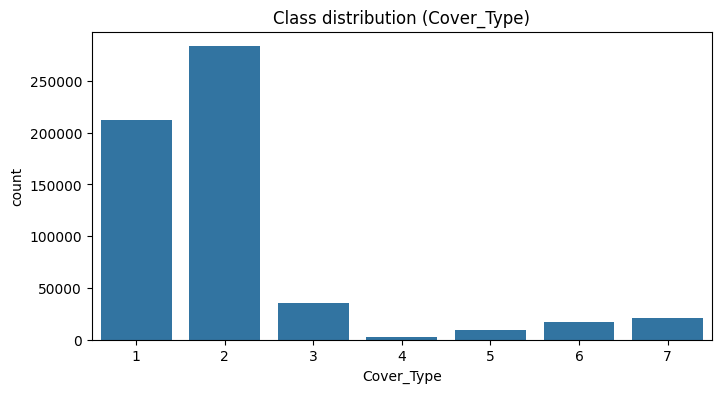

In [28]:
# Class distribution
plt.figure(figsize=(8,4))
sns.countplot(x='Cover_Type', data=data)
plt.title('Class distribution (Cover_Type)')
plt.show()

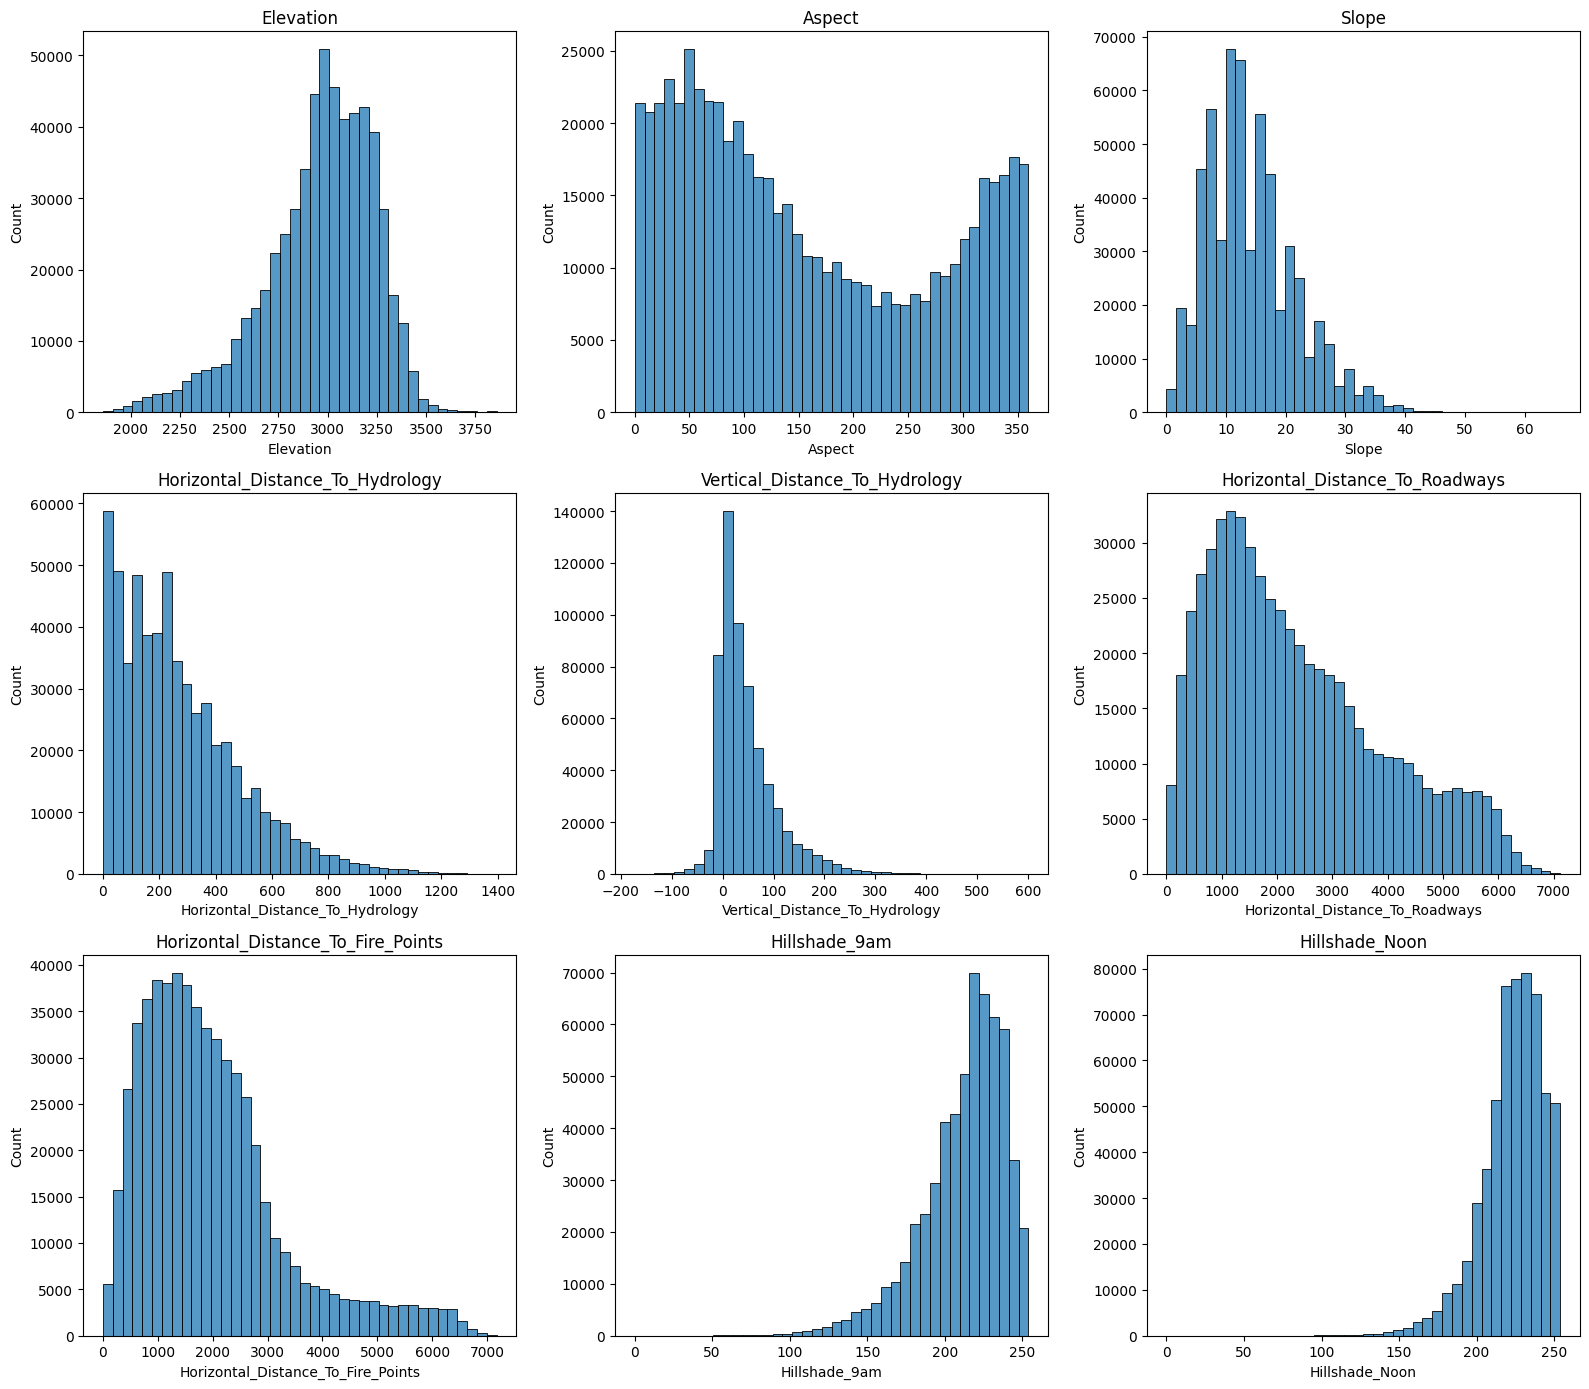

In [31]:
num_cols = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Hillshade_9am','Hillshade_Noon','Hillshade_3pm']

plt.figure(figsize=(16,14))
for i,col in enumerate(num_cols[:9], 1):
    plt.subplot(3,3,i)
    sns.histplot(data[col], bins=40, kde=False)
    plt.title(col)
plt.tight_layout()
plt.show()


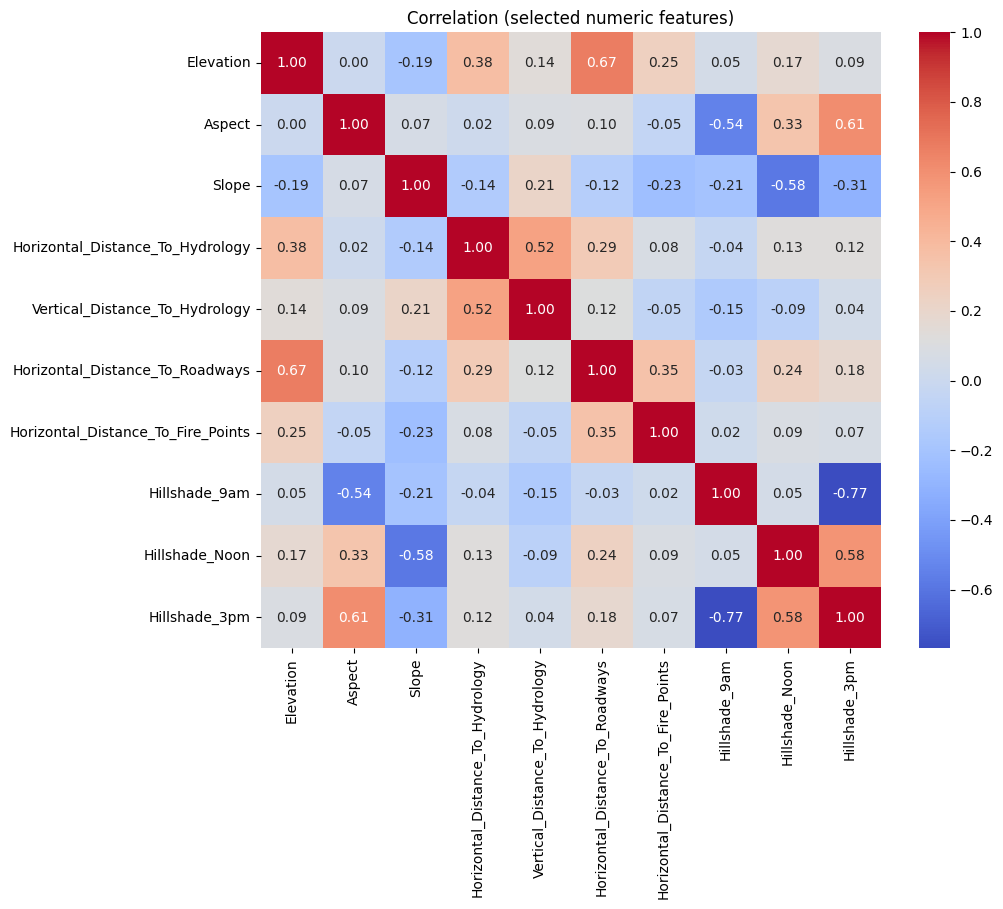

In [10]:
# Correlation heatmap for numeric features (subset to keep plot readable)
plt.figure(figsize=(10,8))
sub = data[num_cols]
sns.heatmap(sub.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation (selected numeric features)')
plt.show()

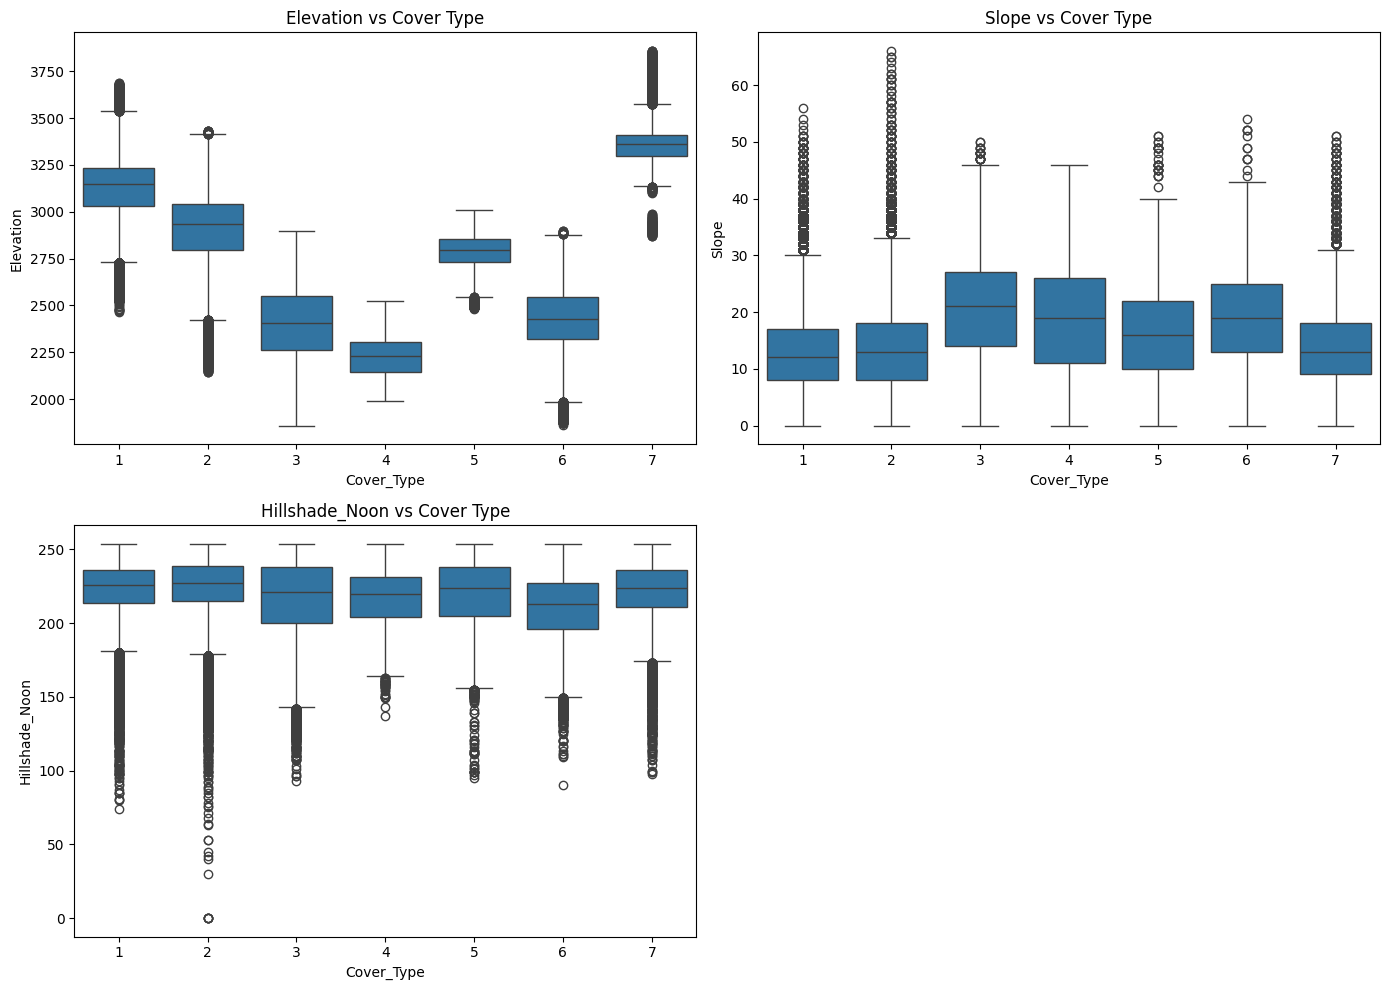

In [32]:
plt.figure(figsize=(14,10))

for i, col in enumerate(['Elevation', 'Slope', 'Hillshade_Noon'], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x='Cover_Type', y=col, data=data)
    plt.title(f"{col} vs Cover Type")
plt.tight_layout()
plt.show()

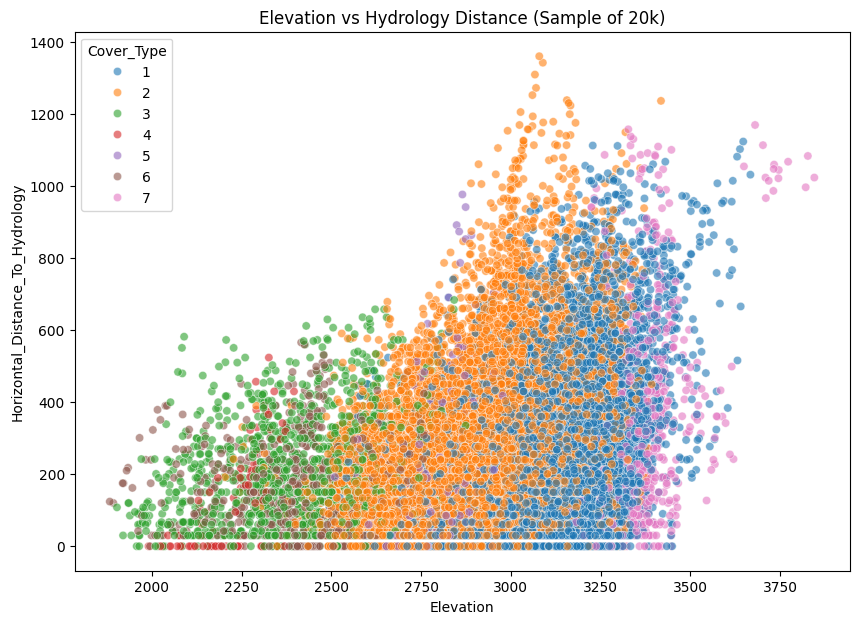

In [33]:
sample = data.sample(20000, random_state=42)

plt.figure(figsize=(10,7))
sns.scatterplot(
    x=sample["Elevation"],
    y=sample["Horizontal_Distance_To_Hydrology"],
    hue=sample["Cover_Type"],
    palette="tab10",
    alpha=0.6
)
plt.title("Elevation vs Hydrology Distance (Sample of 20k)")
plt.show()

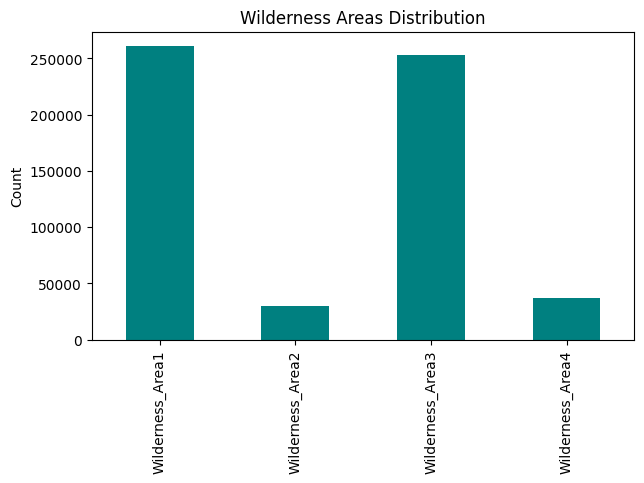


Wilderness area counts:
 Wilderness_Area1    260796
Wilderness_Area2     29884
Wilderness_Area3    253364
Wilderness_Area4     36968
dtype: int64


In [34]:
wilderness_cols = [col for col in data.columns if "Wilderness_Area" in col]

plt.figure(figsize=(7,4))
data[wilderness_cols].sum().plot(kind="bar", color="teal")
plt.title("Wilderness Areas Distribution")
plt.ylabel("Count")
plt.show()

print("\nWilderness area counts:\n", data[wilderness_cols].sum())


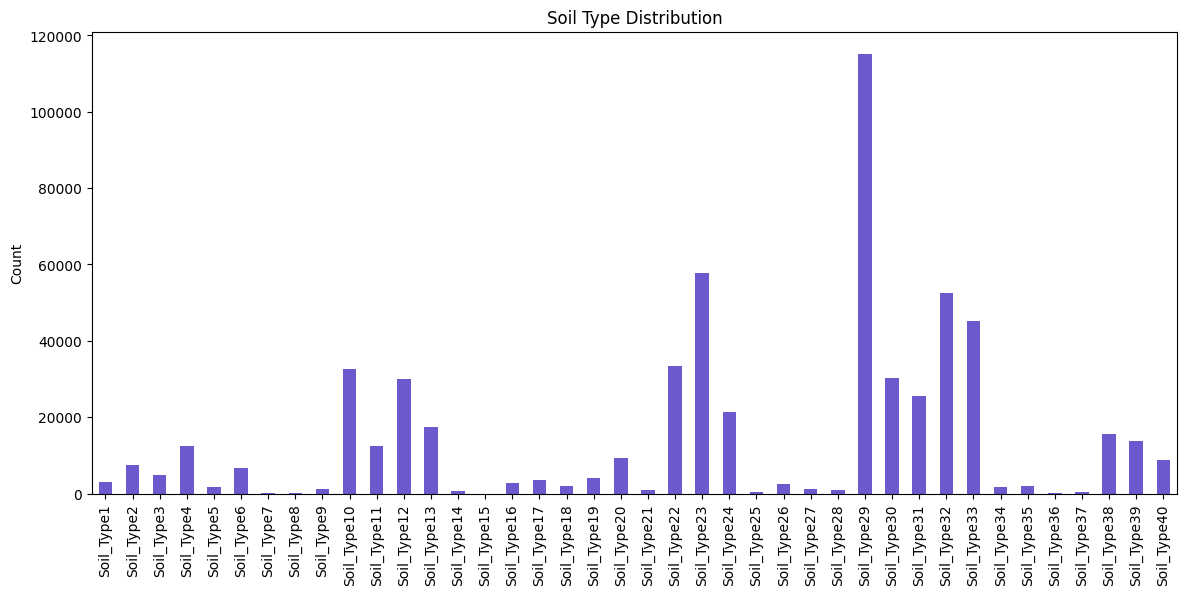

In [35]:
soil_cols = [col for col in data.columns if "Soil_Type" in col]

plt.figure(figsize=(14,6))
data[soil_cols].sum().plot(kind="bar", color="slateblue")
plt.title("Soil Type Distribution")
plt.ylabel("Count")
plt.show()


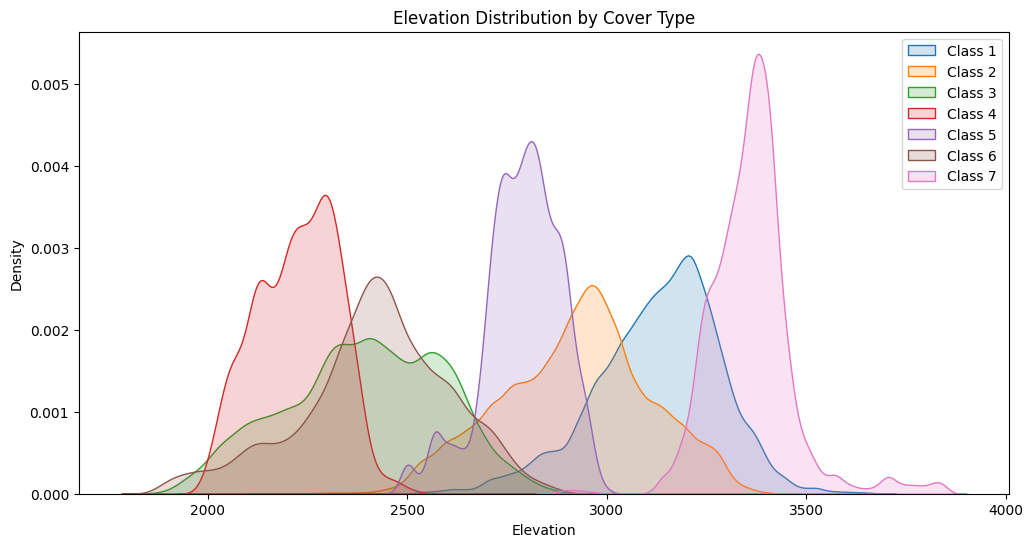

In [36]:
plt.figure(figsize=(12,6))
for c in sorted(data['Cover_Type'].unique()):
    subset = data[data['Cover_Type'] == c]
    sns.kdeplot(subset['Elevation'], label=f"Class {c}", fill=True, alpha=0.2)

plt.title("Elevation Distribution by Cover Type")
plt.xlabel("Elevation")
plt.legend()
plt.show()


---
## 3. Preprocessing
- Convert labels from 1..7 -> 0..6 for Keras.
- Train/test split, scaling, and SMOTE on training set only.

In [12]:
# Feature Seaparation
mask = data['Cover_Type'].notna()
X = data.loc[mask].iloc[:, :-1].values
y = data.loc[mask, 'Cover_Type'].values - 1  # shift to 0..6 for Keras

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=SEED
)
print('Train/test shapes:', X_train.shape, X_test.shape)

# Scale
dtype = X_train.dtype
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# SMOTE on training set (only)
sm = SMOTE(random_state=SEED)
X_train_sm, y_train_sm = sm.fit_resample(X_train_s, y_train)

# Show class counts before/after
from collections import Counter
print('Before SMOTE:', Counter(y_train))
print('After SMOTE: ', Counter(y_train_sm))


Train/test shapes: (97235, 54) (24309, 54)
Before SMOTE: Counter({np.float64(1.0): 67125, np.float64(0.0): 20960, np.float64(4.0): 2238, np.float64(5.0): 1728, np.float64(3.0): 1728, np.float64(6.0): 1728, np.float64(2.0): 1728})
After SMOTE:  Counter({np.float64(1.0): 67125, np.float64(0.0): 67125, np.float64(5.0): 67125, np.float64(4.0): 67125, np.float64(3.0): 67125, np.float64(6.0): 67125, np.float64(2.0): 67125})


---
## 4. ANN Model (Keras) — train, plot history, evaluate
We use BatchNorm + Dropout and EarlyStopping. Adjust batch_size depending on RAM/GPU.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Build model
n_features = X_train_sm.shape[1]
model = Sequential([
    Input(shape=(n_features,)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,223 (223.53 KB)

 Trainable params: 56,455 (220.53 KB)

 Non-trainable params: 768 (3.00 KB)

In [14]:
# Train with early stopping
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = model.fit(X_train_sm, y_train_sm, validation_split=0.1,
                    epochs=50, batch_size=1024, callbacks=[es], verbose=2)

Epoch 1/50
413/413 - 12s - 28ms/step - accuracy: 0.7339 - loss: 0.6166 - val_accuracy: 0.9669 - val_loss: 0.1019
Epoch 2/50
413/413 - 1s - 3ms/step - accuracy: 0.8204 - loss: 0.4075 - val_accuracy: 0.9928 - val_loss: 0.0402
Epoch 3/50
413/413 - 1s - 3ms/step - accuracy: 0.8567 - loss: 0.3353 - val_accuracy: 0.9940 - val_loss: 0.0315
Epoch 4/50
413/413 - 1s - 3ms/step - accuracy: 0.8761 - loss: 0.2954 - val_accuracy: 0.9957 - val_loss: 0.0210
Epoch 5/50
413/413 - 1s - 3ms/step - accuracy: 0.8888 - loss: 0.2698 - val_accuracy: 0.9940 - val_loss: 0.0258
Epoch 6/50
413/413 - 1s - 3ms/step - accuracy: 0.8972 - loss: 0.2514 - val_accuracy: 0.9959 - val_loss: 0.0219
Epoch 7/50
413/413 - 1s - 3ms/step - accuracy: 0.9044 - loss: 0.2363 - val_accuracy: 0.9960 - val_loss: 0.0179
Epoch 8/50
413/413 - 2s - 4ms/step - accuracy: 0.9096 - loss: 0.2248 - val_accuracy: 0.9964 - val_loss: 0.0167
Epoch 9/50
413/413 - 2s - 6ms/step - accuracy: 0.9139 - loss: 0.2154 - val_accuracy: 0.9982 - val_loss: 0.0132

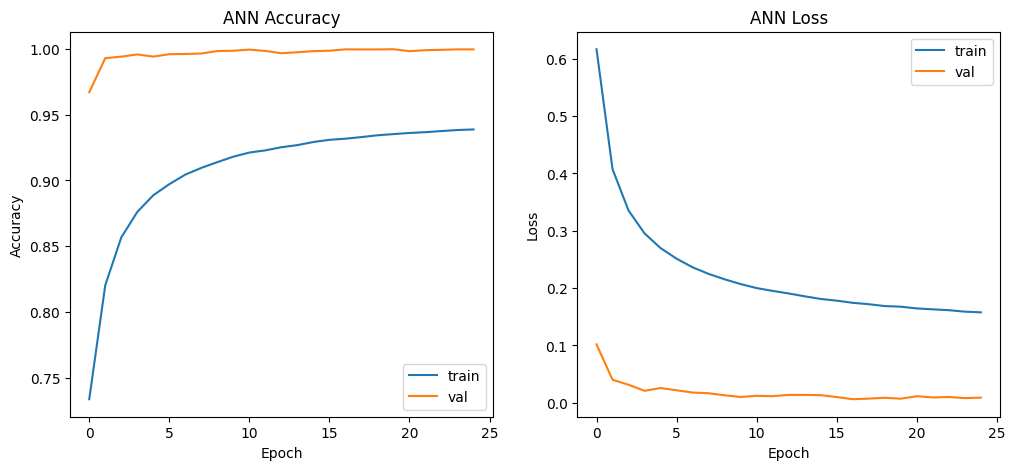

In [15]:
# Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('ANN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('ANN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_s, y_test, verbose=1)
print(f'Test loss={test_loss:.4f}, test_acc={test_acc:.4f}')

# Predictions
y_pred_proba = model.predict(X_test_s)
y_pred = y_pred_proba.argmax(axis=1)

print('\nClassification report (ANN):')
print(classification_report(y_test, y_pred, digits=4))

760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9051 - loss: 0.2550
Test loss=0.2614, test_acc=0.9037
760/760 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Classification report (ANN):
              precision    recall  f1-score   support

         0.0     0.7857    0.9017    0.8397      5240
         1.0     0.9735    0.9016    0.9362     16781
         2.0     0.8537    0.8102    0.8314       432
         3.0     0.9313    0.9722    0.9513       432
         4.0     0.6016    0.9679    0.7420       560
         5.0     0.8144    0.8634    0.8382       432
         6.0     0.8049    0.9931    0.8891       432

    accuracy                         0.9037     24309
   macro avg     0.8236    0.9157    0.8611     24309
weighted avg     0.9157    0.9037    0.9067     24309



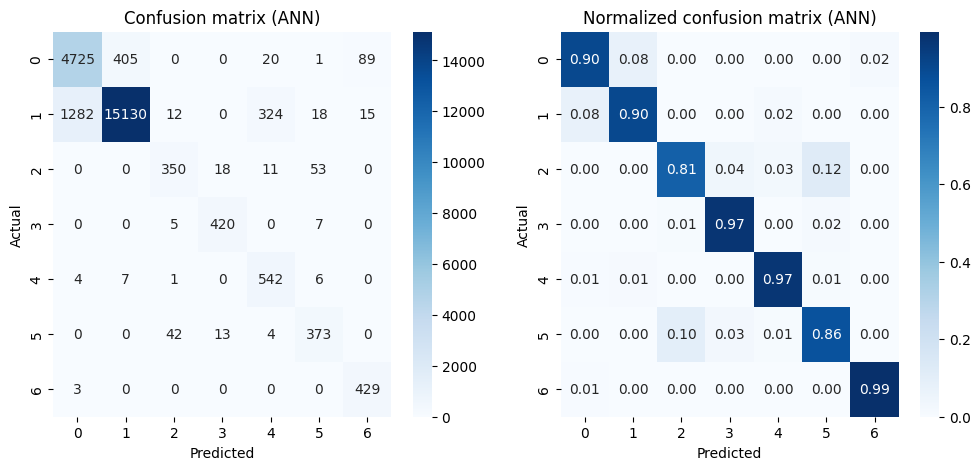

In [17]:
# Confusion matrix (absolute + normalized)
cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, None]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues')
plt.title('Normalized confusion matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

---
## 5. Logistic Regression Model

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression classification report:
              precision    recall  f1-score   support

         0.0     0.7862    0.5025    0.6131      5240
         1.0     0.8469    0.9576    0.8988     16781
         2.0     0.5383    0.5046    0.5209       432
         3.0     0.8089    0.8426    0.8254       432
         4.0     0.5374    0.3339    0.4119       560
         5.0     0.5374    0.5324    0.5349       432
         6.0     0.9150    0.7477    0.8229       432

    accuracy                         0.8238     24309
   macro avg     0.7100    0.6316    0.6611     24309
weighted avg     0.8162    0.8238    0.8102     24309



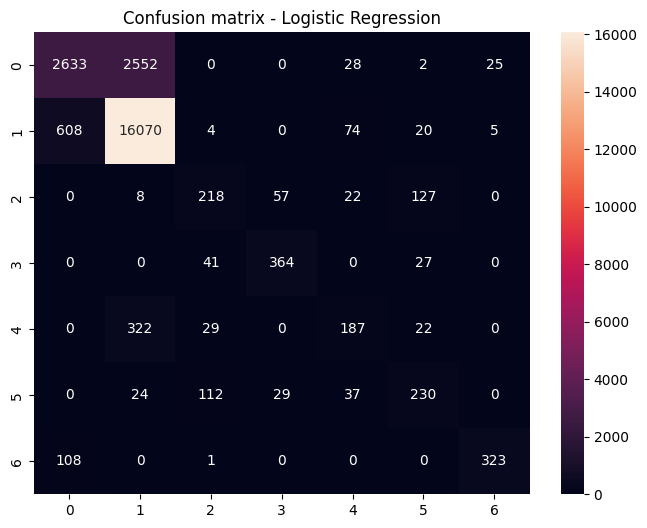

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Fit Logistic Regression (multinomial, saga) -- may take a while but is scalable.
log_clf = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200, n_jobs=-1)
log_clf.fit(X_train_s, y_train)  # note: we didn't SMOTE for LR here; you can try both

pred_log = log_clf.predict(X_test_s)
print('Logistic Regression classification report:')
print(classification_report(y_test, pred_log, digits=4))

# Confusion matrix
cm_log = confusion_matrix(y_test, pred_log)
plt.figure(figsize=(8,6))
sns.heatmap(cm_log, annot=True, fmt='d')
plt.title('Confusion matrix - Logistic Regression')
plt.show()

---
## 6. Linear SVM approximation: `LinearSVC` or `SGDClassifier` (fast on large data)

Linear SVM (SGD) classification report:
              precision    recall  f1-score   support

         0.0     0.8220    0.4372    0.5708      5240
         1.0     0.8350    0.9681    0.8967     16781
         2.0     0.5249    0.3171    0.3954       432
         3.0     0.7970    0.8727    0.8331       432
         4.0     0.3057    0.2500    0.2750       560
         5.0     0.5000    0.5440    0.5211       432
         6.0     0.8861    0.8287    0.8565       432

    accuracy                         0.8139     24309
   macro avg     0.6673    0.6025    0.6212     24309
weighted avg     0.8088    0.8139    0.7947     24309



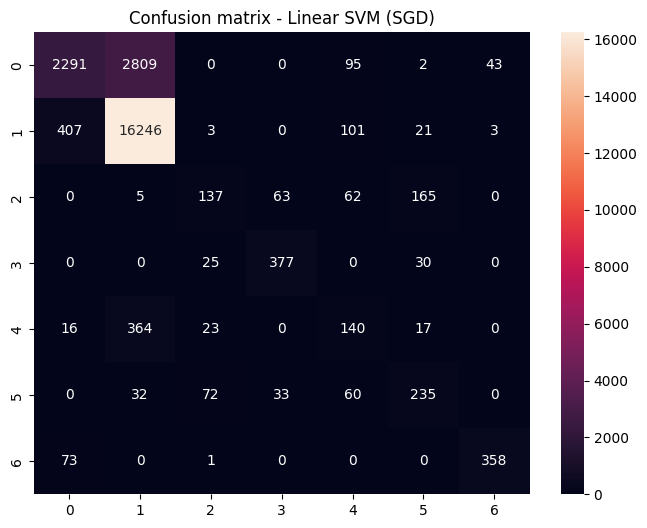

In [19]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

# LinearSVC can be used but may warn about convergence. Use SGDClassifier for large-scale linear SVM
svm_clf = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=SEED)
svm_clf.fit(X_train_s, y_train)

pred_svm = svm_clf.predict(X_test_s)
print('Linear SVM (SGD) classification report:')
print(classification_report(y_test, pred_svm, digits=4))

cm_svm = confusion_matrix(y_test, pred_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.title('Confusion matrix - Linear SVM (SGD)')
plt.show()

---
## 7. Comparison table & Save models
Create a small summary table comparing accuracy / macro-F1 (you can expand to other metrics). Models are saved for reproducibility.

In [20]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Compute metrics for each model
results = []

# ANN
results.append([
    "ANN",
    accuracy_score(y_test, y_pred),
    f1_score(y_test, y_pred, average='macro'),
    f1_score(y_test, y_pred, average='weighted')
])

# Logistic Regression
results.append([
    "Logistic Regression",
    accuracy_score(y_test, pred_log),
    f1_score(y_test, pred_log, average='macro'),
    f1_score(y_test, pred_log, average='weighted')
])

# Linear SVM
results.append([
    "Linear SVM (SGD)",
    accuracy_score(y_test, pred_svm),
    f1_score(y_test, pred_svm, average='macro'),
    f1_score(y_test, pred_svm, average='weighted')
])

# Create dataframe
comparison_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Macro F1", "Weighted F1"]
)

# Sort by Accuracy (highest first)
comparison_df = comparison_df.sort_values(by="Accuracy", ascending=False)

comparison_df


,Model,Accuracy,Macro F1,Weighted F1
0,ANN,0.903739,0.861116,0.906734
1,Logistic Regression,0.823769,0.661138,0.810196
2,Linear SVM (SGD),0.813855,0.621226,0.794672


<Figure size 1000x600 with 0 Axes>

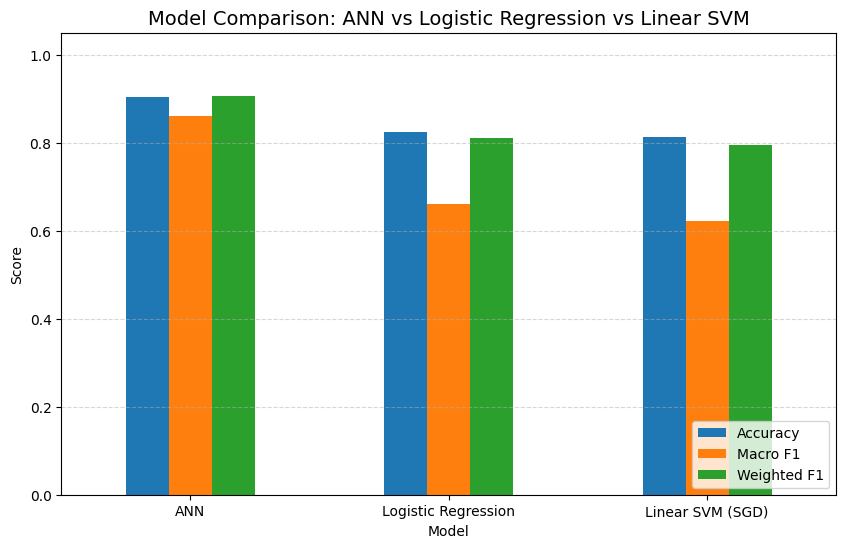

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataframe index is clean
plot_df = comparison_df.set_index("Model")

plt.figure(figsize=(10,6))
plot_df[["Accuracy", "Macro F1", "Weighted F1"]].plot(
    kind="bar",
    figsize=(10,6),
    rot=0
)

plt.title("Model Comparison: ANN vs Logistic Regression vs Linear SVM", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(loc="lower right")

plt.show()
